<a href="https://colab.research.google.com/github/zangatec/4052_team9/blob/main/Task_8_Team_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#Libreria
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline




In [4]:
#Carga del dataset

hr_data = pd.read_csv('/content/HR Dataset.csv')
hr_data.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,17/01/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,24/02/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,15/05/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,03/01/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,01/02/2016,0,2


In [5]:
# Seleccionamos las columnas relevantes para el modelo
selected_columns = [
    'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID',
    'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID',
    'HispanicLatino', 'RaceDesc', 'DateofHire', 'ManagerID',
    'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
    'DaysLateLast30', 'Absences', 'LastPerformanceReview_Date'
]
hr_data_selected = hr_data[selected_columns]
hr_data_selected.head()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,HispanicLatino,RaceDesc,DateofHire,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,LastPerformanceReview_Date
0,0,0,1,1,5,4,0,62506,0,19,No,White,05/07/2011,22.0,4.60,5,0,0,1,17/01/2019
1,1,1,1,5,3,3,0,104437,1,27,No,White,30/03/2015,4.0,4.96,3,6,0,17,24/02/2016
2,1,1,0,5,5,3,0,64955,1,20,No,White,05/07/2011,20.0,3.02,3,0,0,3,15/05/2012
3,1,1,0,1,5,3,0,64991,0,19,No,White,07/01/2008,16.0,4.84,5,0,0,15,03/01/2019
4,0,2,0,5,5,3,0,50825,1,19,No,White,11/07/2011,39.0,5.00,4,0,0,2,01/02/2016


# **Limpieza del Datset**




In [6]:
#Datos faltantes
missing_values = hr_data_selected.isnull().sum()
missing_values

MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
ManagerID                     8
EngagementSurvey              0
EmpSatisfaction               0
SpecialProjectsCount          0
DaysLateLast30                0
Absences                      0
LastPerformanceReview_Date    0
dtype: int64

Sólo ManagerID tiene 8 datos faltantes, al revisar la base el Manager es Webster Butler, el cuál esta tipificado con el número 39, por lo que vamos a completar los espacios vacios con este valor

In [7]:
hr_data_selected['ManagerID'].fillna(39, inplace=True)

<ipython-input-7-33319e1239fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_data_selected['ManagerID'].fillna(39, inplace=True)


Tenemos dos variables categóricas en el modelo que podemos pasar al formato númerico, 'HispanicLatino' y 'RaceDesc'


In [8]:
# Convertimos 'HispanicLatino' a valores numéricos binarios
hr_data_selected['HispanicLatino'] = hr_data_selected['HispanicLatino'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

<ipython-input-8-8414312283f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_data_selected['HispanicLatino'] = hr_data_selected['HispanicLatino'].apply(lambda x: 1 if x.lower() == 'yes' else 0)


In [9]:
# Convertimos 'RaceDesc' a valores numéricos con el método de codificación one-hot
label_encoder = LabelEncoder()
race_encoded = label_encoder.fit_transform(hr_data_selected['RaceDesc'])
onehot_encoder = OneHotEncoder(sparse=False)
race_encoded_reshaped = race_encoded.reshape(len(race_encoded), 1)
race_onehot_encoded = onehot_encoder.fit_transform(race_encoded_reshaped)
race_onehot_df = pd.DataFrame(race_onehot_encoded,columns=["Race_" + str(int(i)) for i in range(race_onehot_encoded.shape[1])])
hr_data_selected.reset_index(drop=True, inplace=True)
hr_data_selected_encoded = pd.concat([hr_data_selected, race_onehot_df], axis=1)
hr_data_selected_encoded.drop('RaceDesc', axis=1, inplace=True)
hr_data_selected_encoded.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,...,SpecialProjectsCount,DaysLateLast30,Absences,LastPerformanceReview_Date,Race_0,Race_1,Race_2,Race_3,Race_4,Race_5
0,0,0,1,1,5,4,0,62506,0,19,...,0,0,1,17/01/2019,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,1,5,3,3,0,104437,1,27,...,6,0,17,24/02/2016,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,0,5,5,3,0,64955,1,20,...,0,0,3,15/05/2012,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,0,1,5,3,0,64991,0,19,...,0,0,15,03/01/2019,0.0,0.0,0.0,0.0,0.0,1.0
4,0,2,0,5,5,3,0,50825,1,19,...,0,0,2,01/02/2016,0.0,0.0,0.0,0.0,0.0,1.0


Para las columnas de fecha 'DateofHire', 'LastPerformanceReview_Date', vamos a crear dos medida:

1.  **Tenure:** La cantidad de días que el empleado ha estado en la empresa desde la fecha de contratación hasta la fecha actual.
2.   **DaysSinceLastReview:** El número de días desde la última revisión de desempeño del empleado hasta la fecha actual.

Con esto podremos revisar en el modelo de correlación si son un factor importante para la estimación del modelo



In [10]:
# Función para calcular la antigüedad
def calculate_tenure(hire_date, format="%d/%m/%Y"):
    hire_date_parsed = datetime.strptime(hire_date, format)
    today_date = datetime.now()
    return (today_date - hire_date_parsed).days

# Función para calcular los días desde la última revisión de desempeño
def calculate_days_since_last_review(review_date, format="%d/%m/%Y"):
    review_date_parsed = datetime.strptime(review_date, format)
    today_date = datetime.now()
    return (today_date - review_date_parsed).days

In [11]:
hr_data_selected_encoded['Tenure'] = hr_data_selected_encoded['DateofHire'].apply(calculate_tenure)
hr_data_selected_encoded['DaysSinceLastReview'] = hr_data_selected_encoded['LastPerformanceReview_Date'].apply(calculate_days_since_last_review)
hr_data_selected_encoded.drop(['DateofHire', 'LastPerformanceReview_Date'], axis=1, inplace=True)
hr_data_selected_encoded.head()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,...,DaysLateLast30,Absences,Race_0,Race_1,Race_2,Race_3,Race_4,Race_5,Tenure,DaysSinceLastReview
0,0,0,1,1,5,4,0,62506,0,19,...,0,1,0.0,0.0,0.0,0.0,0.0,1.0,4512,1759
1,1,1,1,5,3,3,0,104437,1,27,...,0,17,0.0,0.0,0.0,0.0,0.0,1.0,3148,2817
2,1,1,0,5,5,3,0,64955,1,20,...,0,3,0.0,0.0,0.0,0.0,0.0,1.0,4512,4197
3,1,1,0,1,5,3,0,64991,0,19,...,0,15,0.0,0.0,0.0,0.0,0.0,1.0,5787,1773
4,0,2,0,5,5,3,0,50825,1,19,...,0,2,0.0,0.0,0.0,0.0,0.0,1.0,4506,2840


# **Análisis de Correlación**

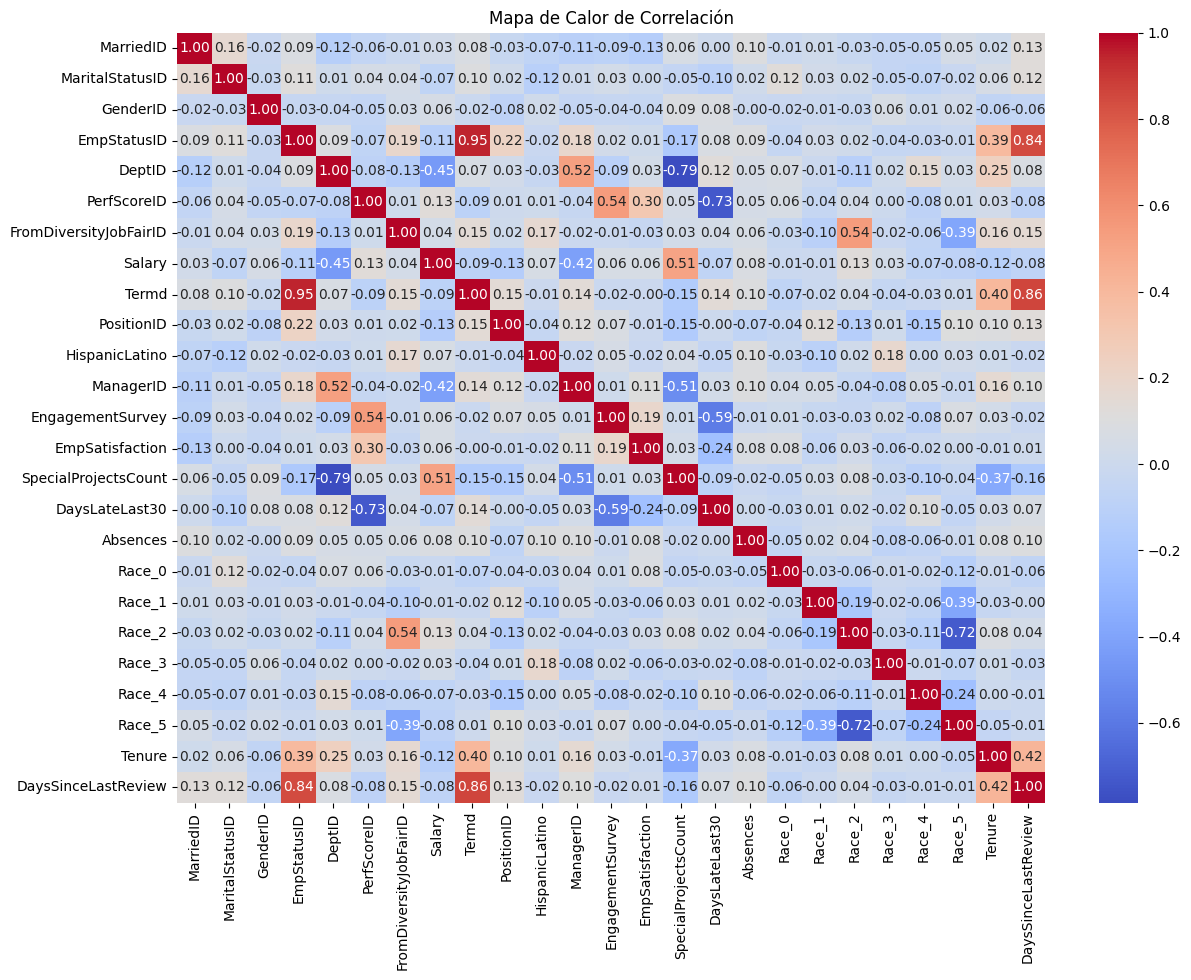

In [12]:
correlation_matrix = hr_data_selected_encoded.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Mapa de Calor de Correlación')
plt.show()

De acuerdo con la tarea 7, nuestra hipotesis consideraba que podríamos predecir PerfScoreID con las siguientes variables:

•	Employment Satisfaction: The relation expected is a direct relation between Employment Satisfaction and Performance Score. As employment satisfaction increases, performance score increases.

•	Manager ID: As the bibliography states, because LMX is important for employees' performance, we think that some managers will influence the individual performance ID behavior. Some manager's IDs will be associated with greater performance.

•	Special Projects Count: This metric can provide us with information about the employee's ability to take on responsibilities, contribute beyond their regular tasks, and determine if they are proactive and able to problem-solve.

•	Absences: Regular attendance and punctuality can impact productivity and the ability to consistently contribute to the team and organization, so performance may decrease with an increase in the number of absences.

•	Engagement Survey Results: According to the readings, employee engagement is directly related to performance and productivity. Therefore, if the employee received a high score in the survey, it may indicate that they are making a positive contribution to the work environment and the achievement of objectives.

Con el análisis de correlación podemos observar que existe una correlación moderada entre PerfScoreIDy EmpSatisfaction, así como EngagementSurvey, lo que sugiere que estas características pueden ayudarnos en la predicción del rendimiento del empleado.

Pero tambien podemos observar que no hay una que realmente tenga una correlación fuerte para predecir 'PerfScoreIDy', esto nos puede indicar que no hay una única característica en específico que determine la puntuación de rendimiento, sino que probablemente sea una combinación de varios factores.

# **Estadísticas descriptivas**

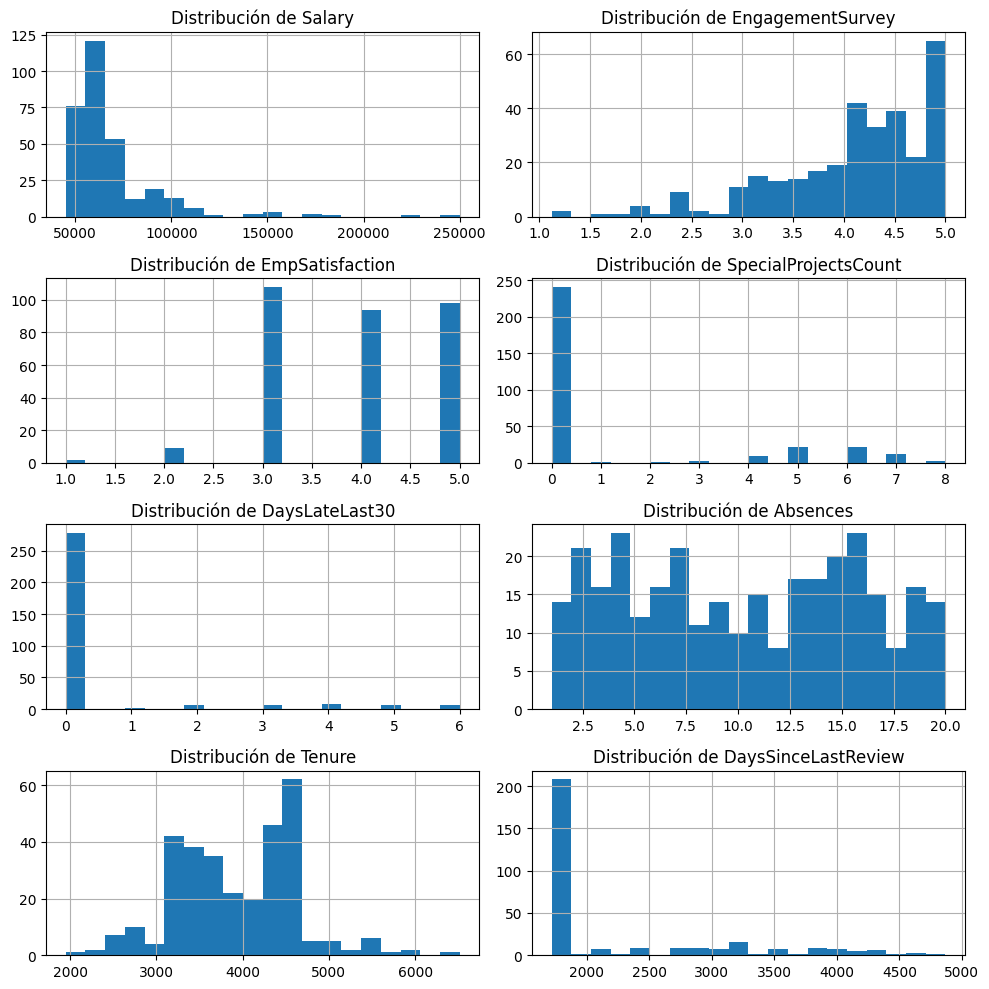

In [13]:
#Histogramas
numeric_features = [
    'Salary', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
    'DaysLateLast30', 'Absences', 'Tenure', 'DaysSinceLastReview'
]

plt.figure(figsize=(10, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 2, i)
    hr_data_selected_encoded[feature].hist(bins=20)
    plt.title(f'Distribución de {feature}')

plt.tight_layout()
plt.show()

In [14]:
#Estadísticos
descriptive_stats = hr_data_selected_encoded.describe(include='all')
descriptive_stats

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,...,DaysLateLast30,Absences,Race_0,Race_1,Race_2,Race_3,Race_4,Race_5,Tenure,DaysSinceLastReview
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,...,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.00000,311.000000,311.000000,311.000000
mean,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,...,0.414791,10.237942,0.009646,0.093248,0.257235,0.003215,0.03537,0.601286,3932.048232,2252.112540
std,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,...,1.294519,5.852596,0.097898,0.291248,0.437814,0.056705,0.18501,0.490423,713.063817,827.612978
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1951.000000,1717.000000
25%,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,...,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3335.500000,1741.000000
50%,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,...,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,3918.000000,1760.000000
75%,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,...,0.000000,15.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,4506.000000,2792.500000
max,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,...,6.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,6515.000000,4868.000000




1.   'Salary': La mayoría de los salarios se concentran en el rango inferior, con algunos empleados que ganan significativamente más, lo que sugiere una distribución sesgada hacia la derecha.
2.   'EngagementSurvey' y 'EmpSatisfaction': Ambas características muestran una distribución relativamente uniforme, pero con una ligera tendencia hacia los valores más altos.
3.   'SpecialProjectsCount': La mayoría de los empleados no tienen proyectos especiales, con solo unos pocos que tienen una cantidad mayor.
4.   'DaysLateLast30': La mayoría de los empleados no han llegado tarde en los últimos 30 días.
5.   'Absences': La distribución de las ausencias parece uniforme.
6.   'Tenure': La duración de los empleados en las empresas varía con tendencia en una curva normal
7.   'DaysSinceLastReview': Hay una gran cantidad de empleados que han tenido una revisión de desempeño en fechas más recientes.



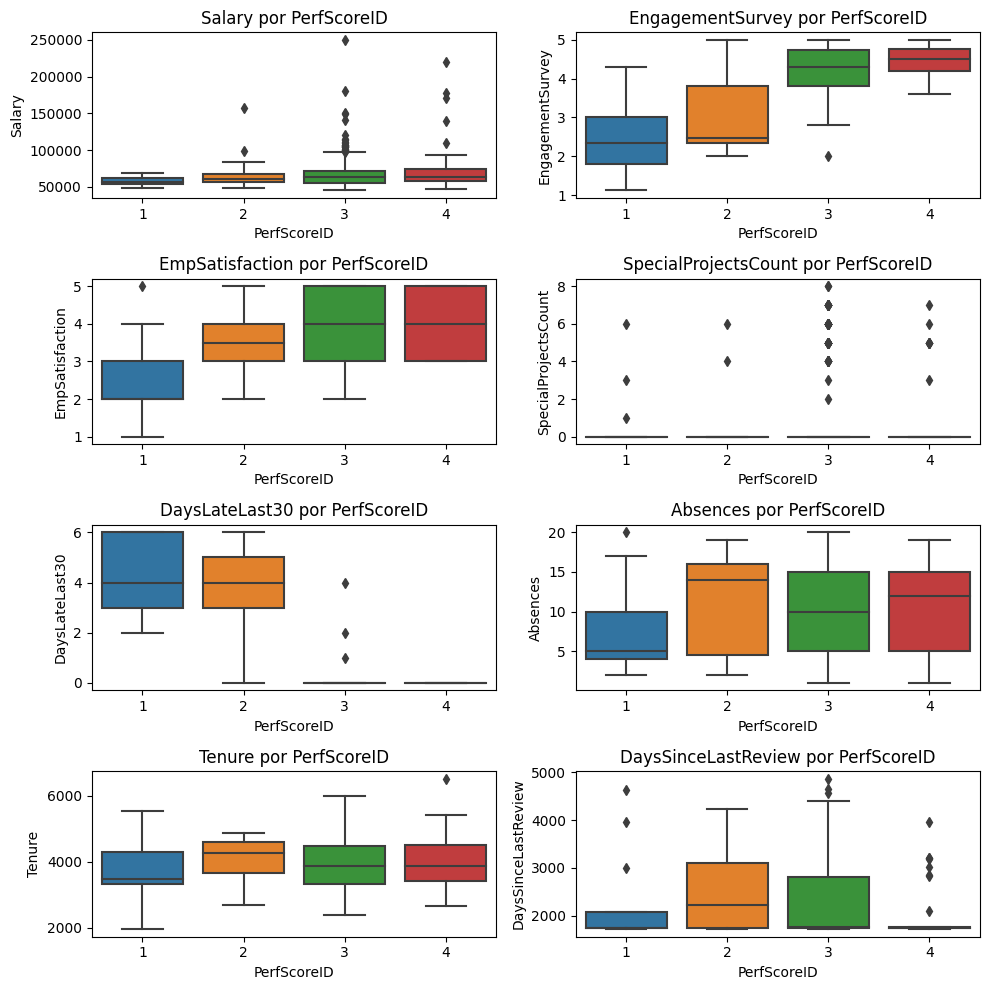

In [15]:
#Gráficas de caja de las variables vs 'PerfScoreID'
plt.figure(figsize=(10, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x='PerfScoreID', y=feature, data=hr_data_selected_encoded)
    plt.title(f'{feature} por PerfScoreID')

plt.tight_layout()
plt.show()

# **Modelo**

In [16]:
#Partición del conjunto de datos
X = hr_data_selected_encoded.drop('PerfScoreID', axis=1)
y = hr_data_selected_encoded['PerfScoreID']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((248, 24), (248,)), ((63, 24), (63,)))

In [17]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Precisión del modelo:", accuracy)
print("Matriz de confusión:\n", conf_matrix)
print("Informe de clasificación:\n", class_report)

Precisión del modelo: 0.8412698412698413
Matriz de confusión:
 [[ 0  0  0  0]
 [ 1  2  1  0]
 [ 0  0 51  3]
 [ 0  0  5  0]]
Informe de clasificación:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.50      0.67         4
           3       0.89      0.94      0.92        54
           4       0.00      0.00      0.00         5

    accuracy                           0.84        63
   macro avg       0.47      0.36      0.40        63
weighted avg       0.83      0.84      0.83        63



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

La precisión general del modelo es del 84.1%, pero la matriz de confusión muestra que no hay predicciones correctas para la clase 1 y la clase 4 posiblemente a un desbalance en el conjunto de datos

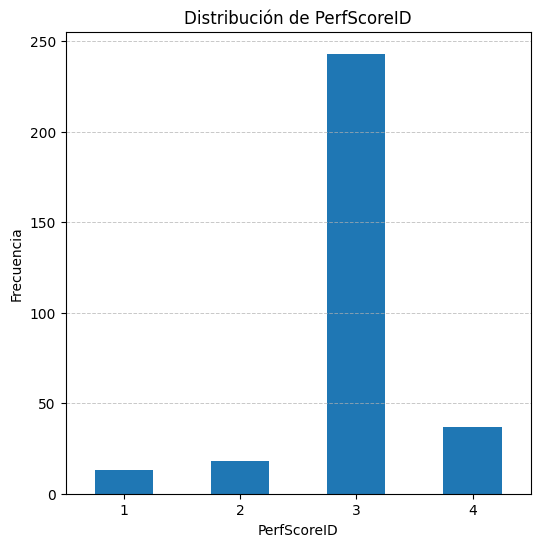

In [18]:
#Revisar el balance de los datos:
perf_score_distribution = hr_data_selected_encoded['PerfScoreID'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
perf_score_distribution.plot(kind='bar')
plt.title('Distribución de PerfScoreID')
plt.xlabel('PerfScoreID')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

Vamos a Over-sampling el modelo utilizando la técnica SMOTE

In [19]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Distribución de clases después de SMOTE:", sorted(Counter(y_train_smote).items()))

Distribución de clases después de SMOTE: [(1, 189), (2, 189), (3, 189), (4, 189)]


In [20]:
#Regresíon Lineal con el modelo balanceado
logreg_smote = LogisticRegression(max_iter=1000)
logreg_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = logreg_smote.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
class_report_smote = classification_report(y_test, y_pred_smote)

print("Precisión del modelo SMOTE:", accuracy_smote)
print("Matriz de confusión SMOTE:\n", conf_matrix_smote)
print("Informe de clasificación SMOTE:\n", class_report_smote)

Precisión del modelo SMOTE: 0.4444444444444444
Matriz de confusión SMOTE:
 [[ 0  0  0  0]
 [ 1  2  0  1]
 [ 3  0 24 27]
 [ 0  0  3  2]]
Informe de clasificación SMOTE:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.50      0.67         4
           3       0.89      0.44      0.59        54
           4       0.07      0.40      0.11         5

    accuracy                           0.44        63
   macro avg       0.49      0.34      0.34        63
weighted avg       0.83      0.44      0.56        63



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

La precisión general del modelo disminuyó considerablemente vs la primera prueba, pero pudimos obtener las siguiente mejora:

1.   Clase 4: A pesar de la baja precisión, el recall ha aumentado significativamente. Esto significa que el modelo ahora es capaz de identificar una mayor proporción de la clase 4 a costa de hacer más falsos positivos.

Las métricas de precisión y recall en el "informe de clasificación" nos muestran un equilibrio entre identificar correctamente las clases minoritarias (clases 2 y 4) y mantener la precisión en la clase mayoritaria (clase 3).

El bajo valor de f1-score para la clase 3 y la clase 4 sugiere que el modelo está luchando para encontrar un equilibrio entre precisión y recall para estas clases.



Para mejorar el modelo y de acuerdo a lo que vimos en la matriz de correlaciones vamos a utilizar la técnica de PCA para disminuir las dimenciones y que el modelo tome la proporción necesaria de cada una de las variables ya que vimos con no existen correalciones fuertes y que nuestra hipotesis es que es un conjunto de las mismas.

In [21]:
#Creación de PCA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=0.95)  #Puedes ajustar el número de componentes, por ahora dejaremos 95%
pipeline = make_pipeline(scaler, pca)
pipeline.fit(X_train_smote)

# Transformamos el conjunto de entrenamiento
X_train_pca = pipeline.transform(X_train_smote)
X_test_pca = pipeline.transform(X_test)

logreg_pca = LogisticRegression(max_iter=1000)
logreg_pca.fit(X_train_pca, y_train_smote)

y_pred_pca = logreg_pca.predict(X_test_pca)

In [22]:
# Evaluamos el modelo:
accuracy_pca = accuracy_score(y_test, y_pred_pca)
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
class_report_pca = classification_report(y_test, y_pred_pca)

#Información del PCA
print("Número de componentes:", pca.n_components_)
print("Varianza por cada componente:", pca.explained_variance_ratio_)


print("Precisión del modelo con PCA:", accuracy_pca)
print("Matriz de confusión con PCA:\n", conf_matrix_pca)
print("Informe de clasificación con PCA:\n", class_report_pca)

Número de componentes: 18
Varianza por cada componente: [0.14381256 0.13017214 0.09027182 0.07248843 0.05561327 0.05411151
 0.0507546  0.04621926 0.04427366 0.04260346 0.03711787 0.03471622
 0.03340811 0.02969113 0.02494255 0.02352917 0.0201011  0.01837585]
Precisión del modelo con PCA: 0.6825396825396826
Matriz de confusión con PCA:
 [[ 0  0  0  0]
 [ 1  2  1  0]
 [ 0  0 37 17]
 [ 0  0  1  4]]
Informe de clasificación con PCA:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.50      0.67         4
           3       0.95      0.69      0.80        54
           4       0.19      0.80      0.31         5

    accuracy                           0.68        63
   macro avg       0.53      0.50      0.44        63
weighted avg       0.89      0.68      0.75        63



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


La precisión global del modelo mejoró a 68.3% vs 44.4% con SMOTE, esto demuestra que la técnica de PCA ayudó a nuestro modelo.



Vamos ajustar los hiperparamétros con el método 'GridSearchCV', para mejorar la precisión del modelo



In [25]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Estandarizar las características
    ('pca', PCA()),               # Aplicar PCA
    ('logreg', LogisticRegression())  # Modelo de regresión logística
])


param_grid = {
    'pca__n_components': [5, 10, 15, 20],  # Número de componentes a mantener
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
    'logreg__penalty': ['l1', 'l2'],  # Tipo de penalización
    'logreg__solver': ['liblinear']  # Algoritmo a usar en el problema de optimización
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

print("Mejores parámetros:", grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Mejores parámetros: {'logreg__C': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear', 'pca__n_components': 20}
Mejor puntuación de validación cruzada (accuracy): 0.8308644126873475


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [27]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Paso de estandarización
    ('pca', PCA(n_components=20)),  # Paso de PCA con 20 componentes principales
    ('logreg', LogisticRegression(C=100, penalty='l1', solver='liblinear', max_iter=10000))  # Paso de regresión logística
])

pipeline.fit(X_train_smote, y_train_smote)
y_pred_test = pipeline.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)

print("Precisión en el conjunto de prueba:", accuracy_test)
print("Matriz de confusión en el conjunto de prueba:\n", conf_matrix_test)
print("Informe de clasificación en el conjunto de prueba:\n", class_report_test)

Precisión en el conjunto de prueba: 0.6190476190476191
Matriz de confusión en el conjunto de prueba:
 [[ 0  0  0  0]
 [ 1  2  1  0]
 [ 4  3 33 14]
 [ 0  0  1  4]]
Informe de clasificación en el conjunto de prueba:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.40      0.50      0.44         4
           3       0.94      0.61      0.74        54
           4       0.22      0.80      0.35         5

    accuracy                           0.62        63
   macro avg       0.39      0.48      0.38        63
weighted avg       0.85      0.62      0.69        63



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter 